In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

import numpy as np

In [2]:
# data input
iris_data = pd.read_csv('iris.data', header=None)
iris_data.columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "target"]
head = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

<AxesSubplot:title={'center':'Iris-virginica'}>

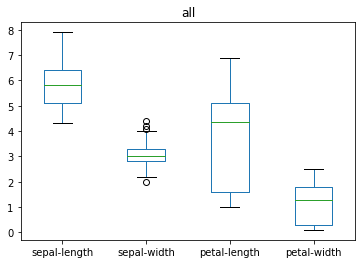

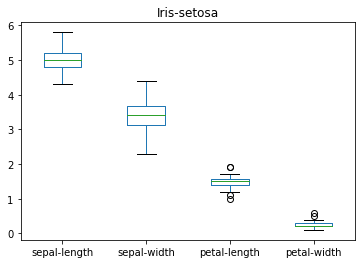

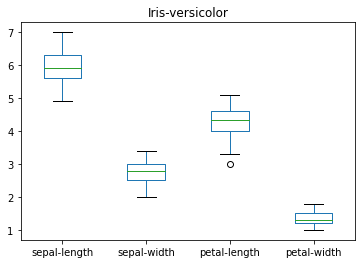

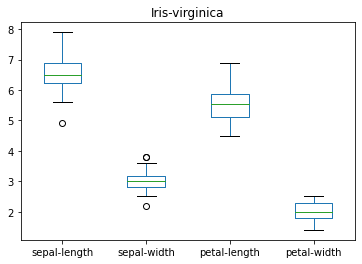

In [3]:
# Split data based on their labels (targets) and show the data distribution of each feature again
iris_data.plot(kind='box', title='all')
iris_data[iris_data.target == "Iris-setosa"].plot(kind='box', title='Iris-setosa')
iris_data[iris_data.target == "Iris-versicolor"].plot(kind='box', title='Iris-versicolor')
iris_data[iris_data.target == "Iris-virginica"].plot(kind='box', title='Iris-virginica')

In [4]:
# Show the data distribution by average, standard deviation of every feature.
for i in ["sepal-length", "sepal-width", "petal-length", "petal-width"]:
    print(iris_data[i].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal-length, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal-width, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal-length, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal-width, dtype: float64


Iris-setosa


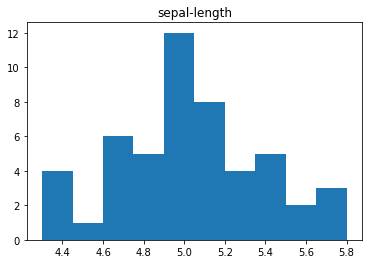

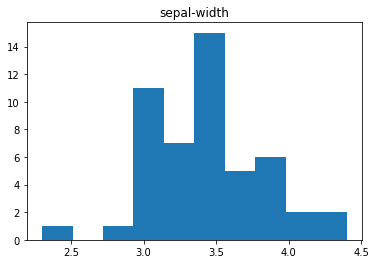

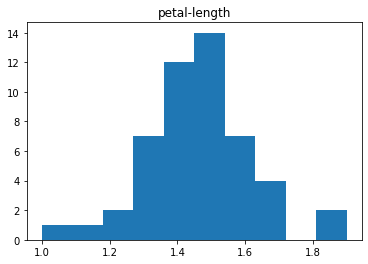

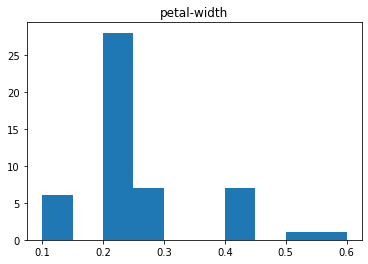

Iris-versicolor


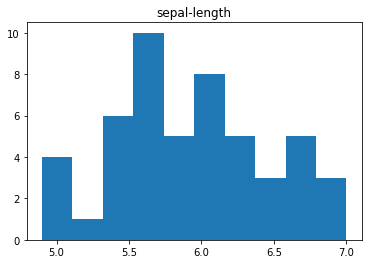

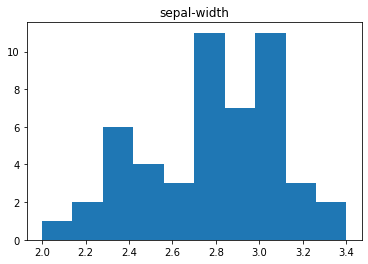

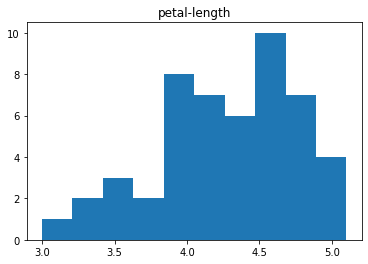

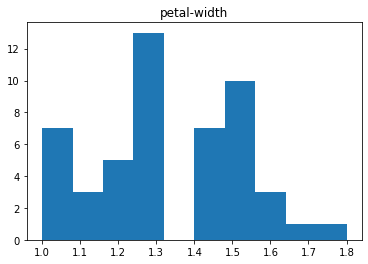

Iris-virginica


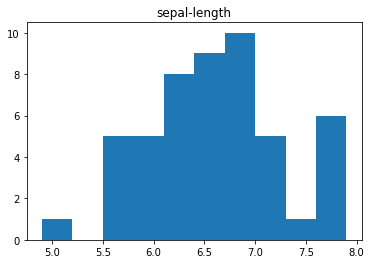

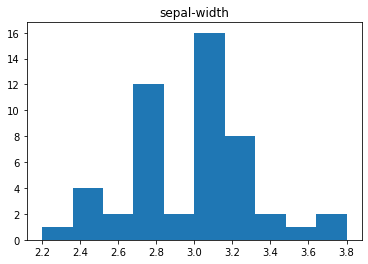

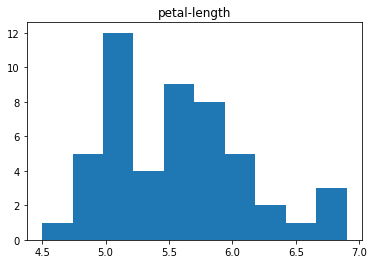

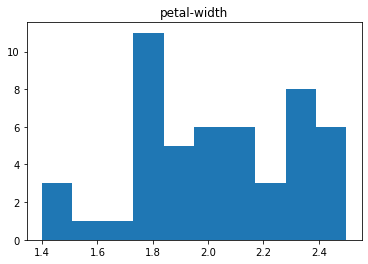

In [5]:
# Show the data distribution by value frequency(binning might be needed) of every feature.
for target in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    print(target)
    for feature in ["sepal-length", "sepal-width", "petal-length", "petal-width"]:
        plt.title(feature)
        plt.hist(iris_data[feature][iris_data.target == target])
        plt.show()
    

In [6]:
# Gaussian with K-fold cross-validation
# select specific column
# shuffle
iris_data=iris_data.sample(frac=1).reset_index(drop=True)
# print(iris_data)
data = iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width"]]
target = iris_data["target"]

# transform dataframe to nparray
data = data.values
target = target.values

#confusing matrix
confusing_matrix = []
for i in range(0,4):
    temp = []
    for k in range(0,4):
        temp.append(0)
    confusing_matrix.append(temp)

# Gaussian
clf = GaussianNB()

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(data):
    clf.fit(data[train_index], target[train_index])
    predic_temp = clf.predict(data[test_index])
    # transform str to int
    predic = []
    for i in range(0,len(predic_temp)):
        for k in range(0,len(head)):
            if predic_temp[i] == head[k]:
                predic.append(k)
                break
    # transform str to int
    actually = []
    actually_temp = target[test_index]
    for i in range(0,len(actually_temp)):
        for k in range(0,len(head)):
            if actually_temp[i] == head[k]:
                actually.append(k)
                break
    # build matrix
    for i in range(0,len(predic)):
        confusing_matrix[actually[i]][predic[i]] += 1
#     for i in range(0,4):
#         print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
#     print()

# compute decision
for i in range(0,3):
    confusing_matrix[i][3] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1] + confusing_matrix[i][2])

# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] + confusing_matrix[2][2]) / 150
# print(accuracy)

# compute sensitivity
for i in range(0,3):
    confusing_matrix[3][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i] + confusing_matrix[2][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = head + ['sensitive'], columns = head + ['precision']))
print(accuracy)

                 Iris-setosa  Iris-versicolor  Iris-virginica  precision
Iris-setosa             50.0             0.00            0.00       1.00
Iris-versicolor          0.0            46.00            4.00       0.92
Iris-virginica           0.0             4.00           46.00       0.92
sensitive                1.0             0.92            0.92       0.00
0.9466666666666667


In [7]:
# Gaussian with Holdout validation
# shuffle
iris_data=iris_data.sample(frac=1).reset_index(drop=True)
# print(iris_data)
data = iris_data[["sepal-length", "sepal-width", "petal-length", "petal-width"]]
target = iris_data["target"]

# training data
traindata = data.loc[:len(data)*7/10]
traintarget = target.loc[:len(data)*7/10]
traindata = traindata.values
traintarget = traintarget.values

# testing data
testdata = data.loc[len(traindata):]
testtarget = target.loc[len(traindata):]
testdata = testdata.values
testtarget = testtarget.values

# confirm all data in
# print(len(data), len(traindata), len(testdata))

# Gaussian
clf = GaussianNB()
clf.fit(traindata, traintarget)
predic_temp = clf.predict(testdata)
# print(type(predic_temp), len(predic_temp))

# convert to integer
predic = []
for i in range(0,len(predic_temp)):
    for k in range(0,len(head)):
        if predic_temp[i] == head[k]:
            predic.append(k)
            break
# transform str to int
actually = []
actually_temp = testtarget
for i in range(0,len(actually_temp)):
    for k in range(0,len(head)):
        if actually_temp[i] == head[k]:
            actually.append(k)
            break
            
#confusing matrix
confusing_matrix = []
for i in range(0,4):
    temp = []
    for k in range(0,4):
        temp.append(0)
    confusing_matrix.append(temp)
    
for i in range(0,len(predic)):
    confusing_matrix[actually[i]][predic[i]] += 1

# compute decision
for i in range(0,3):
    confusing_matrix[i][3] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1] + confusing_matrix[i][2])

# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] + confusing_matrix[2][2]) / testtarget.shape[0]
# print(accuracy)

# compute sensitivity
for i in range(0,3):
    confusing_matrix[3][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i] + confusing_matrix[2][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = head + ['sensitive'], columns = head + ['precision']))
print(accuracy)

                 Iris-setosa  Iris-versicolor  Iris-virginica  precision
Iris-setosa             12.0         0.000000             0.0   1.000000
Iris-versicolor          0.0        20.000000             0.0   1.000000
Iris-virginica           0.0         2.000000            10.0   0.833333
sensitive                1.0         0.909091             1.0   0.000000
0.9545454545454546


In [8]:
# input data
agaricus_lepiota = pd.read_csv('agaricus-lepiota.data', header=None)
agaricus_lepiota.columns = ["posion-or-not", "cap-shape", "cap-surface", "cap-color", 
                             "bruises", "odor", "gill-attachment", 
                            "gill-spacing", "gill-size", "gill-color", 
                            "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
                            "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", 
                            "veil-type", "veil-color", "ring-number", 
                            "ring-type", "spore-print-color", "population", 
                            "habitat"]
attribute = ["posion-or-not", "cap-shape", "cap-surface", "cap-color", 
                             "bruises", "odor", "gill-attachment", 
                            "gill-spacing", "gill-size", "gill-color", 
                            "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
                            "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", 
                            "veil-type", "veil-color", "ring-number", 
                            "ring-type", "spore-print-color", "population", 
                            "habitat"]
kinds = [
['b', 'c', 'x', 'f', 'k', 's'],
['f', 'g', 'y', 's'],
['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
['t','f'],
['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
['a', 'd', 'f', 'n'],
['c', 'w', 'd'],
['b', 'n'],
['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
['e', 't'],
['b', 'c', 'u', 'e', 'z', 'r'],
['f', 'y', 'k', 's'],
['f', 'y', 'k', 's'],
['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
['p', 'u'],
['n', 'o', 'w', 'y'],
['n', 'o', 't'],
['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
['a', 'c', 'n', 's', 'v', 'y'],
['g', 'l', 'm', 'p', 'u', 'w', 'd']]

category = [['e', 'p'],
['b', 'c', 'x', 'f', 'k', 's'],
['f', 'g', 'y', 's'],
['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
['t','f'],
['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
['a', 'd', 'f', 'n'],
['c', 'w', 'd'],
['b', 'n'],
['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
['e', 't'],
['b', 'c', 'u', 'e', 'z', 'r'],
['f', 'y', 'k', 's'],
['f', 'y', 'k', 's'],
['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
['p', 'u'],
['n', 'o', 'w', 'y'],
['n', 'o', 't'],
['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
['a', 'c', 'n', 's', 'v', 'y'],
['g', 'l', 'm', 'p', 'u', 'w', 'd']]
# drop missing
agaricus_lepiota = agaricus_lepiota.mask(agaricus_lepiota.eq('?')).dropna()

cap-shape
p


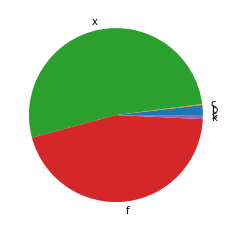

e


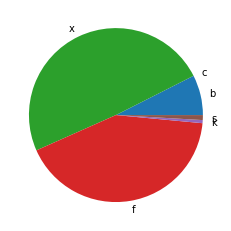

cap-surface
p


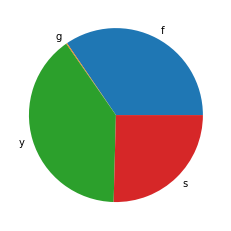

e


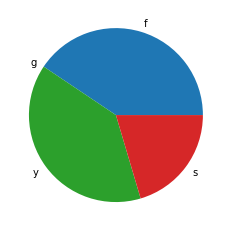

cap-color
p


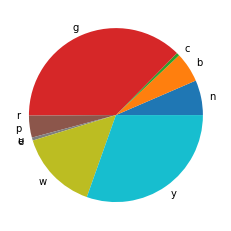

e


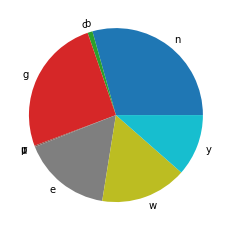

bruises
p


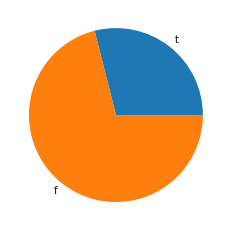

e


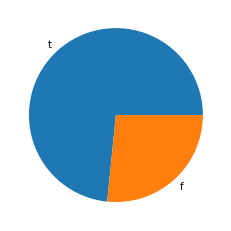

odor
p


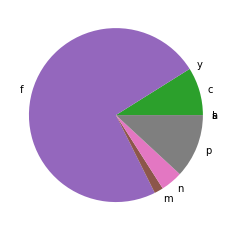

e


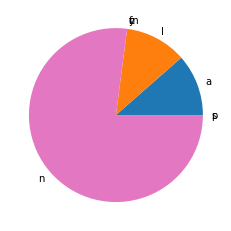

gill-attachment
p


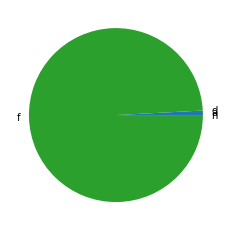

e


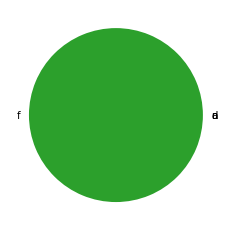

gill-spacing
p


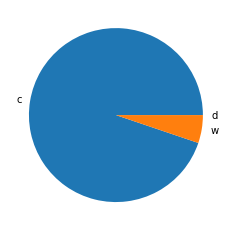

e


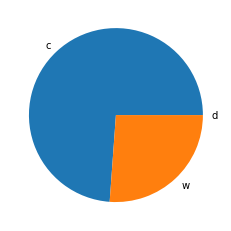

gill-size
p


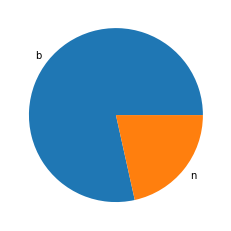

e


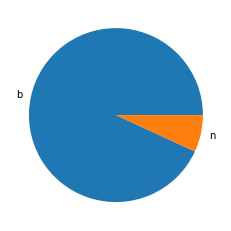

gill-color
p


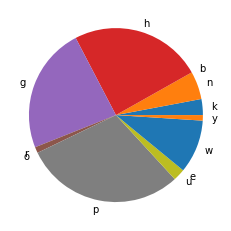

e


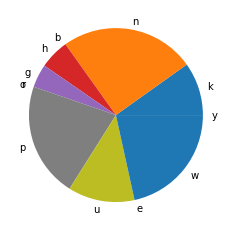

stalk-shape
p


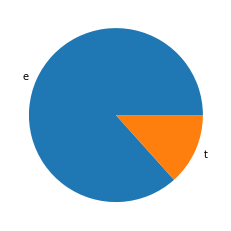

e


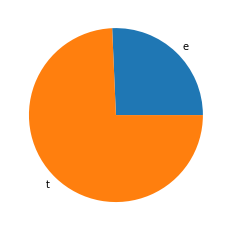

stalk-root
p


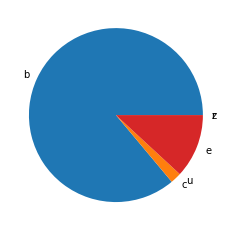

e


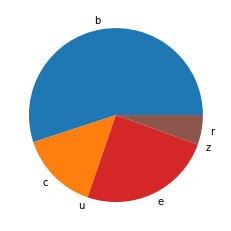

stalk-surface-above-ring
p


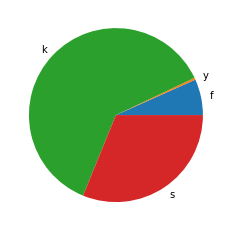

e


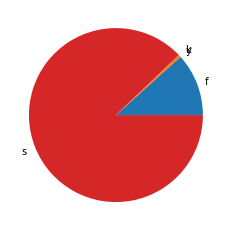

stalk-surface-below-ring
p


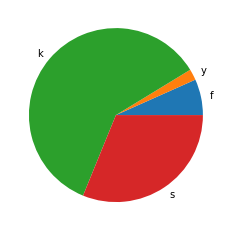

e


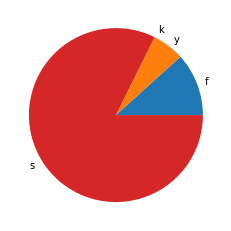

stalk-color-above-ring
p


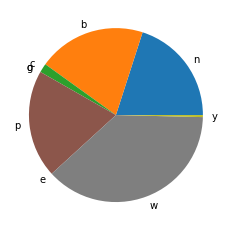

e


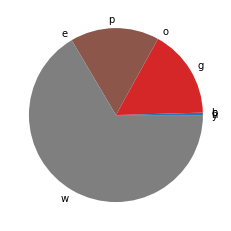

stalk-color-below-ring
p


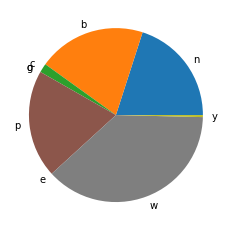

e


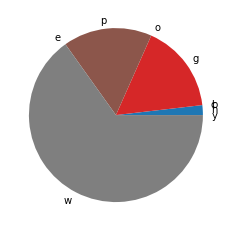

veil-type
p


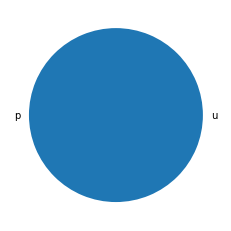

e


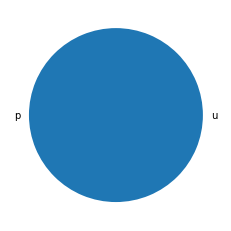

veil-color
p


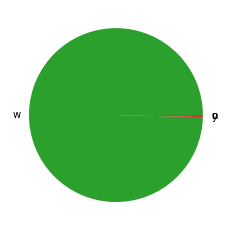

e


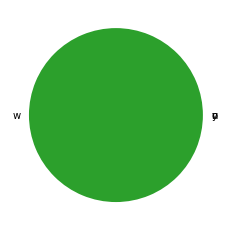

ring-number
p


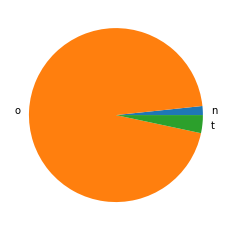

e


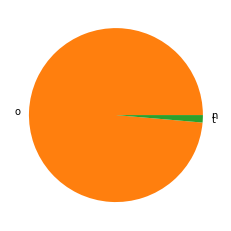

ring-type
p


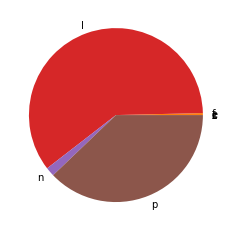

e


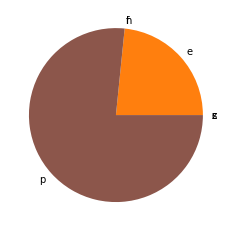

spore-print-color
p


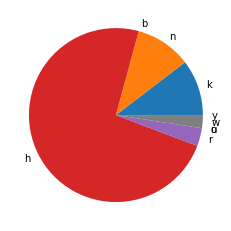

e


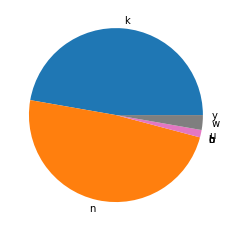

population
p


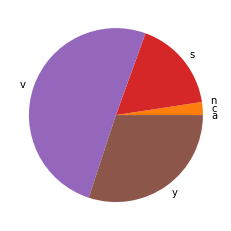

e


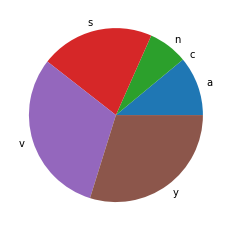

habitat
p


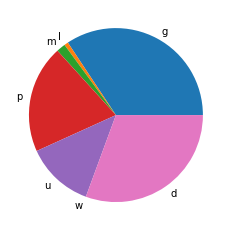

e


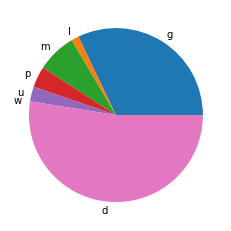

In [9]:
group = agaricus_lepiota.groupby("posion-or-not")
#print(group.groups)
#print(type(group.get_group("p")))
count = 0
for i in attribute[1:]:
    sizeE = []
    sizeP = []
    p = group.get_group('p')
    e = group.get_group('e')
    #print(p[i])
    #print(len(e),len(p))
    for kind in kinds[count]:
        #print(kind)
        sizeP.append(len(p[p[i]== kind] ))
        sizeE.append(len(e[e[i]== kind] ))
        #print(len(p[i] == kind), len(e[i] == kind))
#     print(sizeE, sizeP)
    print(i)
    print('p')
    plt.pie(sizeP, labels = kinds[count])
    plt.show()
    print('e')
    plt.pie(sizeE, labels = kinds[count])
    plt.show()
    count = count + 1
        
        

In [92]:
# CategoricalNB with Holdout validation
# shuffle
agaricus_lepiota = agaricus_lepiota.sample(frac=1).reset_index(drop=True)
# transform data
convert_data = np.zeros( (5644, 23), dtype=np.int16)
for i in range(0,agaricus_lepiota.shape[0]):
    for j in range(0,agaricus_lepiota.shape[1]):
        for k in range(0,len(category[j])): 
            if agaricus_lepiota.loc[i][attribute[j]] == category[j][k]:
                convert_data[i][j] = k
                break
print("finish")
convert_data = pd.DataFrame(convert_data)
convert_data.columns = attribute
data = convert_data[attribute[1:]]
target = convert_data[attribute[0]]
# print(data_temp.loc[1])

#transform to number
# print(data_temp.shape[0])
# print(target_temp.shape[0])

# data = np.zeros( (5644, 21), dtype=np.int16)
# for i in range(0,data_temp.shape[0]):
#     for j in range(0,data_temp.shape[1]):
#         for k in range(0,len(category[j])): 
#             if data_temp.loc[i][attribute[j+1]] == category[j][k]:
#                 data[i][j] = k
#                 break

# target = np.zeros(5644, dtype=np.int16)
# for i in range(0,target_temp.shape[0]):
#     if target_temp.loc[i] == 'p':
#         target[i] = 0
#     else:
#        target[i] = 1

data = pd.DataFrame(data)
target = pd.DataFrame(target)
# training data
traindata = data.loc[:len(data)*7/10]
traintarget = target.loc[:len(data)*7/10]
traindata = traindata.values
traintarget = traintarget.values

# testing data
testdata = data.loc[len(traindata):]
testtarget = target.loc[len(traindata):]
testdata = testdata.values
testtarget = testtarget.values


finish


In [93]:
# CategoricalNB with Laplace smoothing
# print(convert_data)
# print(data)
# print(target)
# print(convert_data.shape)
print(data.shape, target.shape)
print(traindata.shape, traintarget.shape)
clf = CategoricalNB()
clf.fit(traindata, traintarget.ravel())
predic_temp = clf.predict(testdata)
# print(traintarget.shape)
# print(predic_temp)
confusing_matrix = []
for i in range(0,3):
    temp = []
    for k in range(0,3):
        temp.append(0)
    confusing_matrix.append(temp)

for i in range(0,len(predic_temp)):
    confusing_matrix[testtarget[i][0]][predic_temp[i]] += 1

    # compute decision
for i in range(0,2):
    confusing_matrix[i][2] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1])

# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] ) / testtarget.shape[0]
# print(accuracy)

# compute sensitivity
for i in range(0,2):
    confusing_matrix[2][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = ["posion", "NO"] + ['sensitive'], columns = ["posion", "NO"] + ['precision']))

print("accuracy",accuracy)

(5644, 22) (5644, 1)
(3951, 22) (3951, 1)
                posion          NO  precision
posion     1018.000000    7.000000   0.993171
NO           63.000000  605.000000   0.905689
sensitive     0.941721    0.988562   0.000000
accuracy 0.958653278204371


In [98]:
print(target.shape, data.shape)
# CategoricalNB without Laplace smoothing
clf = CategoricalNB(alpha=1.0e-10)
clf.fit(traindata, traintarget.ravel())
predic_temp = clf.predict(testdata)
# print(traintarget.shape)
# print(predic_temp)
confusing_matrix = []
for i in range(0,3):
    temp = []
    for k in range(0,3):
        temp.append(0)
    confusing_matrix.append(temp)

for i in range(0,len(predic_temp)):
    confusing_matrix[testtarget[i][0]][predic_temp[i]] += 1

    # compute decision
for i in range(0,2):
    confusing_matrix[i][2] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1])

# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] ) / testtarget.shape[0]
# print(accuracy)

# compute sensitivity
for i in range(0,2):
    confusing_matrix[2][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = ["posion", "NO"] + ['sensitive'], columns = ["posion", "NO"] + ['precision']))

print("accuracy",accuracy)

(5644, 1) (5644, 22)
           posion         NO  precision
posion     1018.0    7.00000   0.993171
NO            0.0  668.00000   1.000000
sensitive     1.0    0.98963   0.000000
accuracy 0.9958653278204371


In [104]:
# CategoricalNB with Kfold with smooth
print(data.shape, target.shape)
#print(data)
data = data.values
target = target.values
target = target.ravel()
# confusung_matrix
confusing_matrix = []
for i in range(0,3):
    temp = []
    for k in range(0,3):
        temp.append(0)
    confusing_matrix.append(temp)
# with smooth
clf = CategoricalNB(alpha=1)
print(id(clf))
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(data):
    clf.fit(data[train_index], target[train_index])
    predic_temp = clf.predict(data[test_index])
    
    actually = target[test_index]
    # build matrix
    for i in range(0,len(predic_temp)):
        confusing_matrix[actually[i]][predic_temp[i]] += 1
#     for i in range(0,4):
#         print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
#     print()

# compute decision
for i in range(0,2):
    confusing_matrix[i][2] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1])

#total test
total = 0
for i in range(0,2):
    for j in range(0,2):
        total += confusing_matrix[i][j]
# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] ) / total
# print(accuracy)

# compute sensitivity
for i in range(0,3):
    confusing_matrix[2][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = ["posion","no posion"] + ['sensitive'], columns = ["posion","no posion"] + ['precision']))
print(accuracy)


(5644, 22) (5644, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [103]:
 # CategoricalNB without Kfold with smooth
confusing_matrix = []
for i in range(0,3):
    temp = []
    for k in range(0,3):
        temp.append(0)
    confusing_matrix.append(temp)
# with smooth

clfv2 = CategoricalNB(alpha=1.0e-10)
print(id(clfv2))
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(data):
    clfv2.fit(data[train_index], target[train_index])
    predic_temp = clfv2.predict(data[test_index])
    
    actually = target[test_index]
    # build matrix
    for i in range(0,len(predic_temp)):
        confusing_matrix[actually[i]][predic_temp[i]] += 1
#     for i in range(0,4):
#         print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
#     print()

# compute decision
for i in range(0,2):
    confusing_matrix[i][2] = confusing_matrix[i][i] / (confusing_matrix[i][0] + confusing_matrix[i][1])

#total test
total = 0
for i in range(0,2):
    for j in range(0,2):
        total += confusing_matrix[i][j]
# compute accuracy
accuracy = (confusing_matrix[0][0] + confusing_matrix[1][1] ) / total
# print(accuracy)

# compute sensitivity
for i in range(0,3):
    confusing_matrix[2][i] = confusing_matrix[i][i] / (confusing_matrix[0][i] + confusing_matrix[1][i])

# for i in range(0,4):
#     print(confusing_matrix[i][0], confusing_matrix[i][1], confusing_matrix[i][2], confusing_matrix[i][3])
# print reult
print(pd.DataFrame(confusing_matrix, index = ["posion","no posion"] + ['sensitive'], columns = ["posion","no posion"] + ['precision']))
print(accuracy)


[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]
140086496511088


/home/wc/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


TypeError: only integer scalar arrays can be converted to a scalar index